 # <center>   ✈ **Airline Passenger Satisfaction** ✈

 <span style="color:#A12288;"><span style="font-size:18px;">*“Once you have tasted flight, you will forever walk the earth with your eyes turned skyward, for there you have been, and there you will always long to return.”*

<span style="font-size:18px;">  – Leonardo da Vinci </span>

# <h><center> <span style="color:#A12288;"><span style="font-size:22px;"><b>BACKGROUND

> <span style="font-size:16px;">  <b>The Airline industry suffered a huge setback after the pandemic, and as per ICAO, the airline industry suffered a 371 bn loss in 2020, and 329 bn with the reduced seat capacity. Hence, to revive the industry in the light of this recession, it is absolutely a necessity to understand the customer pain points, and improve their satisfaction in the services provided.</b></span>

![](https://honeywell.scene7.com/is/image/honeywell/AeroBT-Plane-02242020-2880x1440)

# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>PROBLEM STATEMENT</b>

> <span style="font-size:16px;">  <b>The problem statement is to identify the key factors which lead to the satisfaction of the customer, and before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:
 >*    > <span style="font-size:16px;">  <b>Delays in the flight</b>
 >*   > <span style="font-size:16px;">   <b>Staff efficiency to address customer needs</b>
 >*  > <span style="font-size:16px;">   <b>Services provided in the flight</b></span>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>EXPLORE THE DATA</b>

> <span style="font-size:16px;">  <b>Let us dive deep into the data to check if the data here agrees with our preliminary analysis of the possible factors

In [2]:
#Reading the data file
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


> <span style="font-size:16px;">  <b>Well, we almost guessed the features right, however, we have a detailed data here with 25 features, and we will explore and play with it more, until we find the best

In [3]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [4]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (103904, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 

> <span style="font-size:16px;">  <b> Some observations about the data:
  >*    > <span style="font-size:16px;">  <b>The average delay in flights are 15 minutes, with a deviation of 38
     >*    > <span style="font-size:16px;">  <b>Median of the delays are 0, which means 50% of the flights from this data, were not delayed
  >*    > <span style="font-size:16px;">  <b>The count of Female passengers are more with 52727 !!

> <span style="font-size:16px;">  <b>Now, as we have conducted a preliminary analysis of the data, lets segregate the features into categorical and numerical. Before that let us remove the 'Id' and 'Unnamed: 0' feature from the data

In [5]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [6]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>VISUALIZATION AND INSIGHTS FROM DATA</b>

> <span style="font-size:16px;">  <b>We will visualize any specific trends in the features, and that would help us in feature selection, and better understanding of the data. Later, we will derive some useful insights from our custom made function!

<span style="color:#A12288;"><span style="font-size:18px;"><b>Visualizing Categorical Features</b>

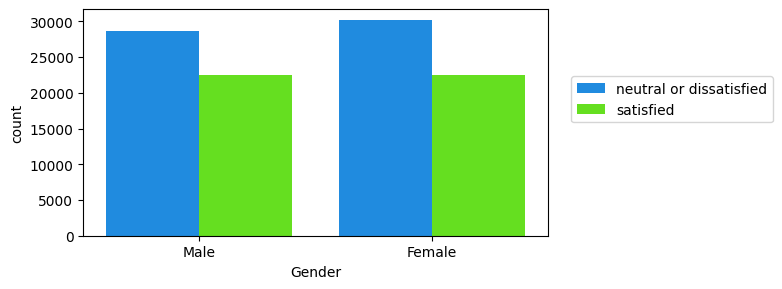

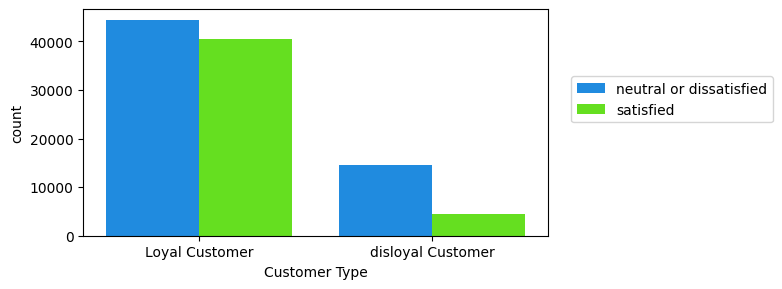

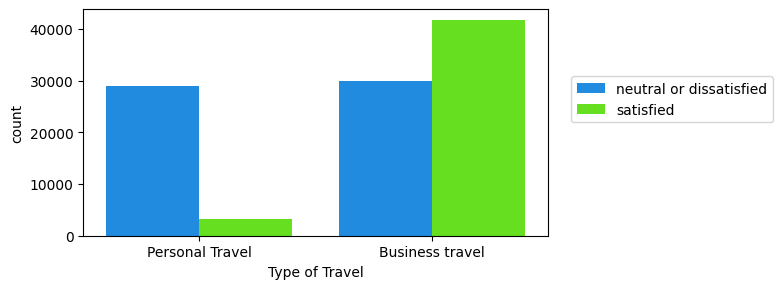

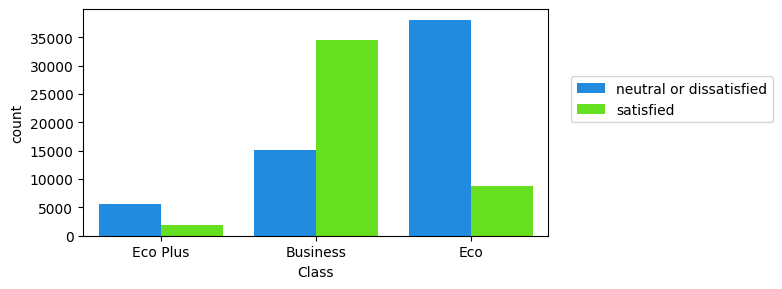

In [8]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

> <span style="font-size:16px;">  <b>Now it's time for some insights with percent values, to back up our conclusions above

In [9]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = data.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

In [10]:
get_insights(df)

**********************************************************************
Insights from 'Gender' data
**********************************************************************
57.26 from Female are neutral or dissatisfied
56.05 from Male are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Customer Type' data
**********************************************************************
52.27 from Loyal Customer are neutral or dissatisfied
76.33 from disloyal Customer are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Type of Travel' data
**********************************************************************
58.26 from Business travel are satisfied
89.83 from Personal Travel are neutral or dissatisfied
************************************

> <span style="font-size:16px;">  <b>From the visualizations and insights, some points are clear:
     >*    > <span style="font-size:16px;">  <b>Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors</b>
 >*   > <span style="font-size:16px;">   <b>Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers</b>
 >*  > <span style="font-size:16px;">   <b>Business Travellers seems to be more satisfied with the flight, than the personal travellers</b></span>
   >*    > <span style="font-size:16px;">  <b>People in business class seems to be the most satisfied lot, and those in economy class are least satisfied</b>
  

> <span style="font-size:16px;">  <b>Now let's analyse the numerical features

<span style="color:#A12288;"><span style="font-size:18px;"><b>Visualizing Numerical Features</b>

<AxesSubplot:>

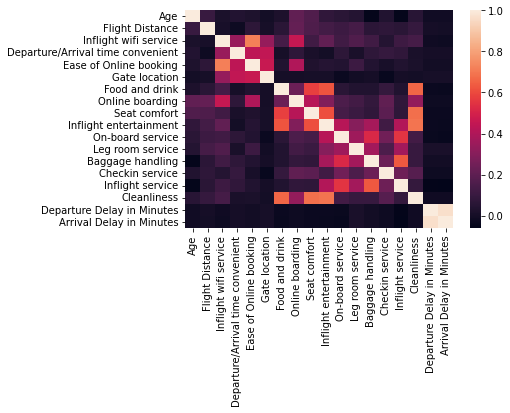

In [11]:
#Creating a heatmap of the correlation values
sns.heatmap(df.corr())

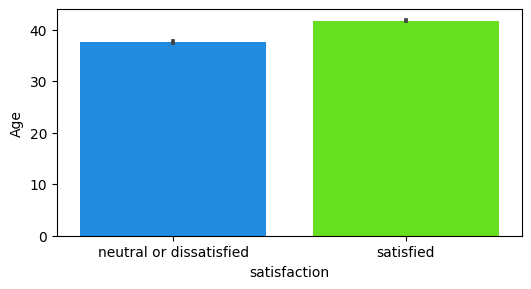

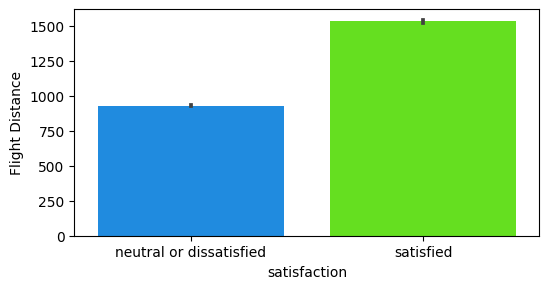

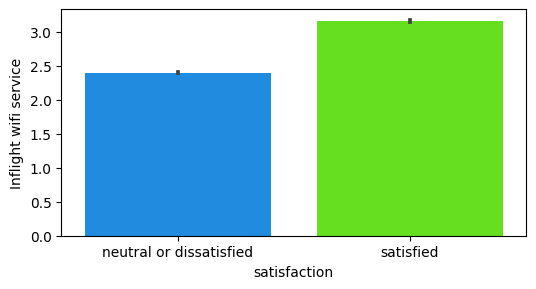

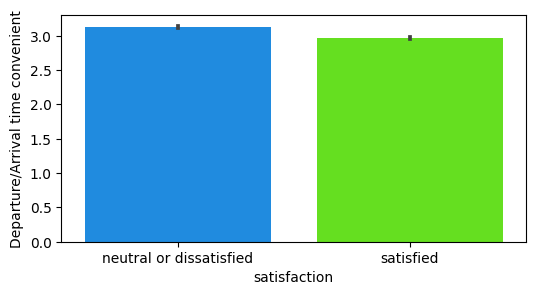

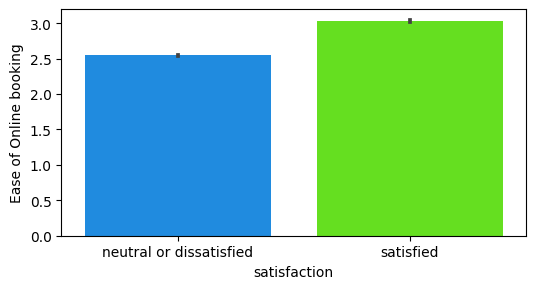

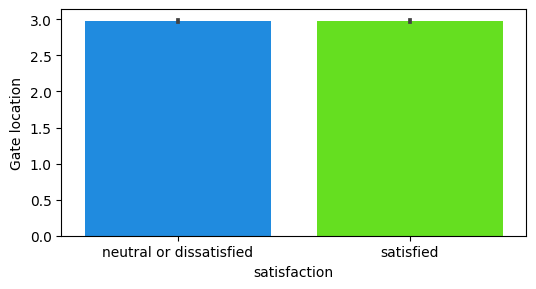

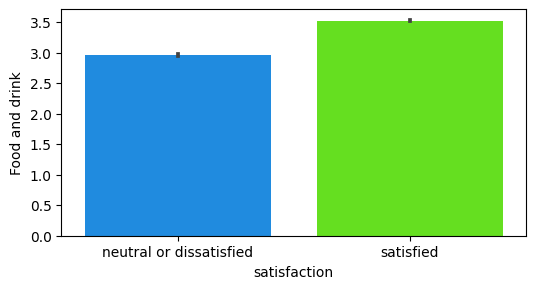

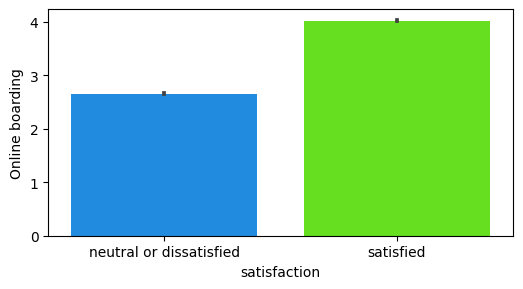

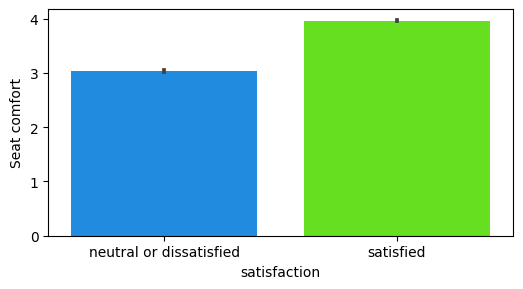

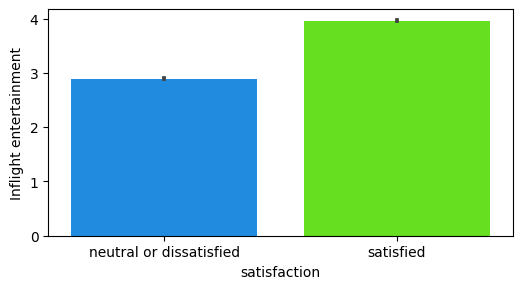

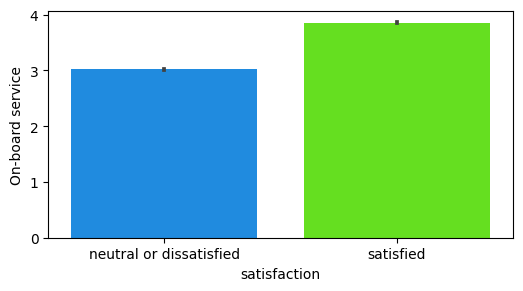

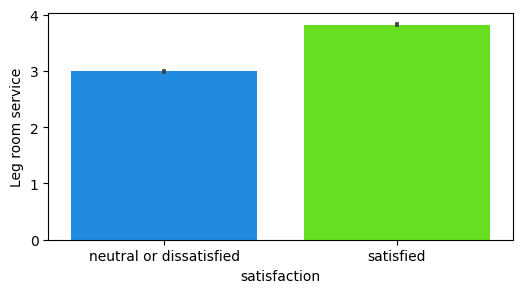

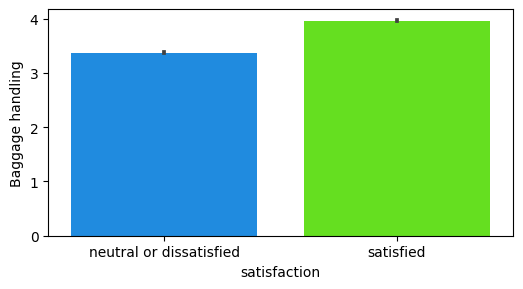

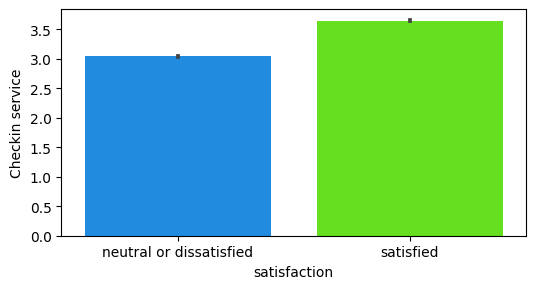

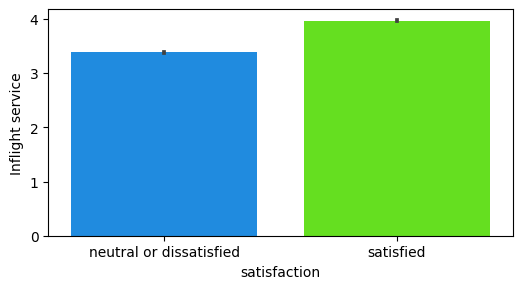

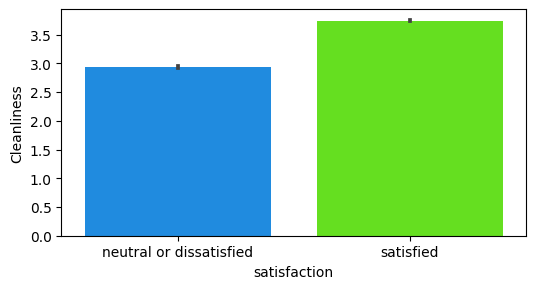

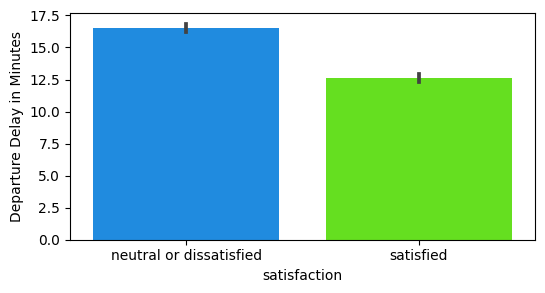

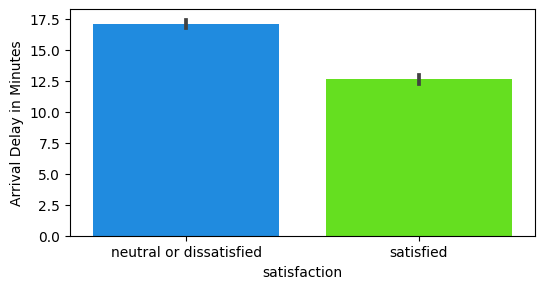

In [12]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')

> <span style="font-size:16px;">  <b>From the plots, it is clear that age and Gate location, does not play a huge role in flight satisfaction, and also the gender does not tell us much as seen in the earlier plot. Hence we drop these values

In [13]:
#Dropping age, gender and gate location
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

> <span style="font-size:16px;">  <b>Let us focus now on the most important factor, we discussed ealier, which is the flight delays. Let us do an analysis of the delays, and it's relation with the satisfaction

In [14]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

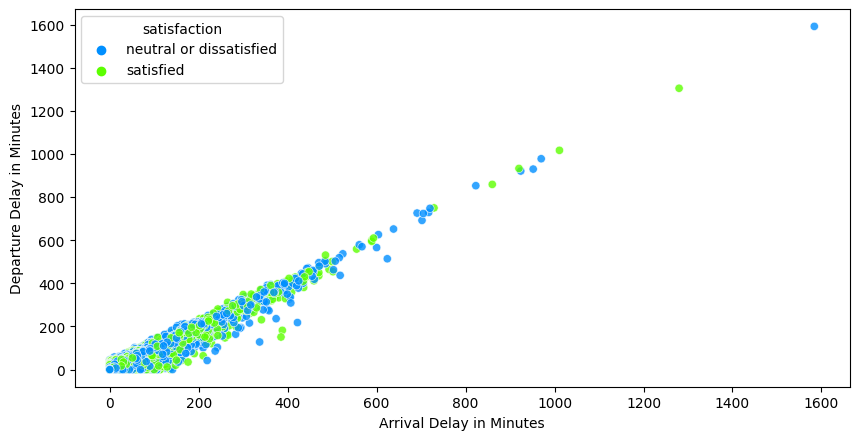

In [15]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

> <span style="font-size:16px;">  <b>The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

(0.0, 1000.0)

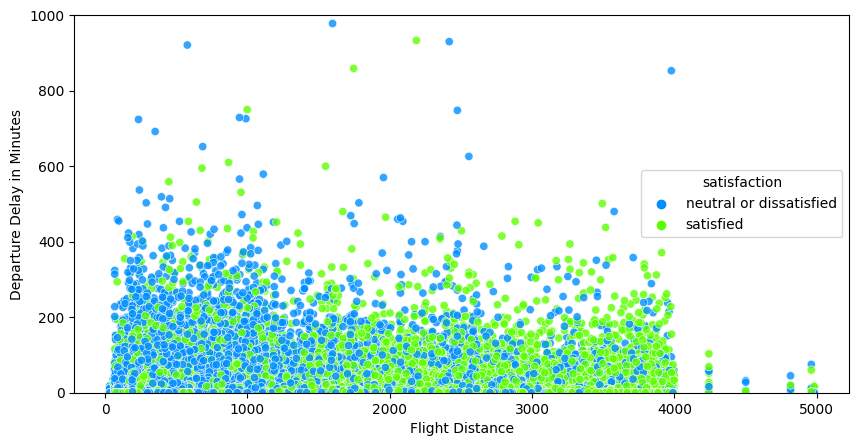

In [16]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

> <span style="font-size:16px;">  <b>The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot! So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

> <span style="font-size:16px;">  <b>Generally, business class seems to have been satisfied more than the passengers from economy or economy plus, let's analyze that

In [17]:
df.groupby('Class').mean()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,
Business,1675.976925,2.775315,2.905910,2.913964,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600,14.398067,14.577272
Eco,743.439748,2.675067,3.199123,2.605241,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097,15.160509,15.672183
Eco Plus,747.125567,2.767948,3.217507,2.661996,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645


> <span style="font-size:16px;">  <b>So, the people from business class have given higher ratings for all the services provided, compared to Eco and Eco plus. Hence 'class' of travel should be a big factor in satisfaction

# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>MISSING VALUES</b>

> <span style="font-size:16px;">  <b>We have 310 missing values in 'Arrival delay', which is not quiet big, in terms of the data point we have, however, we'd not drop these values. And also we'd not settle with a strategy to calculate the mean, and fill in the missing values. We'd try something different here

> <span style="font-size:16px;">  <b>We are already aware that the 'Arrival time' and 'Departure Time' have a sort of linear relationship, so we'll substitute the same departure delay values to the arrival delay values, for the missing values in data points

In [18]:
#Creating a copy of the dataset, before we delete the NA values and substitute
df_copy=df.copy()

In [19]:
df_na = df[df['Arrival Delay in Minutes'].isna()] #The dataset with null values
df_copy.dropna(inplace=True) #Dropping the missing rows from copied dataset
df_na['Arrival Delay in Minutes']=df_na['Departure Delay in Minutes'] #Replacing the null dataset with Arrival delay
df_copyna = pd.concat([df_copy,df_na]) #Creating a new dataframe by combining both
df = df_copyna #Copying the values to original df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

> <span style="font-size:16px;">  <b>Now we have handled the missing data!

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

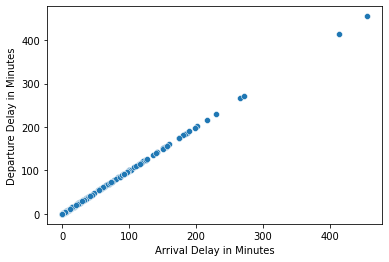

In [21]:
#Let's try plotting the new values
sns.scatterplot(data=df_na, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')

# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>MAPPING THE CATEGORICAL VARIABLES

> <span style="font-size:16px;">  <b>We will map the binary variables with 0 and 1, and we will use the get_dummies method for the remaining variables

In [22]:
#Mapping the values
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [23]:
#Transforming the dataframe with mapped values
df=pd.get_dummies(df)

In [24]:
#Checking the data
df.head()

,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,460,3,4,3,5,3,5,5,...,4,4,5,5,25,18.0,0,0,0,1
1,0,1,235,3,2,3,1,3,1,1,...,3,1,4,1,1,6.0,0,1,0,0
2,1,1,1142,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,1,1,0,0
3,1,1,562,2,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,1,214,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,1,0,0


# <center> <span style="color:#A12288;"><span style="font-size:22px;"><b>BUILDING THE MODEL

> <span style="font-size:16px;">  <b>Now comes the most exciting part of building a model wiwth our data, and let's do some predictions, and most importantly find out the features that stand out

In [25]:
#Preparing X and Y
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [26]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [27]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Scaling the features with pipeline method, and standard scaler
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [29]:
kfold = StratifiedKFold(n_splits=10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


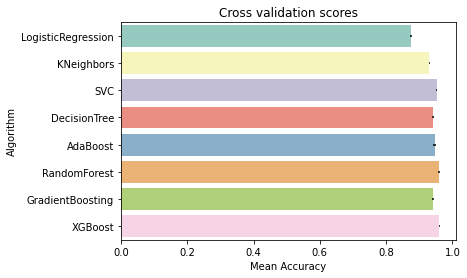

In [30]:
# Modeling step to test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, scaled_X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighbors","SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

> <span style="font-size:16px;">  <b>From the curve, XGBoost works the best, and let us see the accuracy score, and other metrics

In [31]:
#Fitting the model to calculate accuracy
model_xgb = XGBClassifier(random_state =random_state)
model_xgb.fit(scaled_X_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:10:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
#Predicting and calculating accuracy score
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)

0.9603483951686637

> <span style="font-size:16px;">  <b>We get an accuracy score of 96%

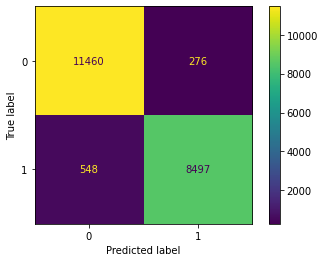

In [33]:
plot_confusion_matrix(model_xgb,scaled_X_test,y_test)

In [34]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11736
           1       0.97      0.94      0.95      9045

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



> <span style="font-size:16px;">  <b>Now, let us plot the feature importances, and let us visualize it

Text(0.5, 1.0, 'Feature Importance')

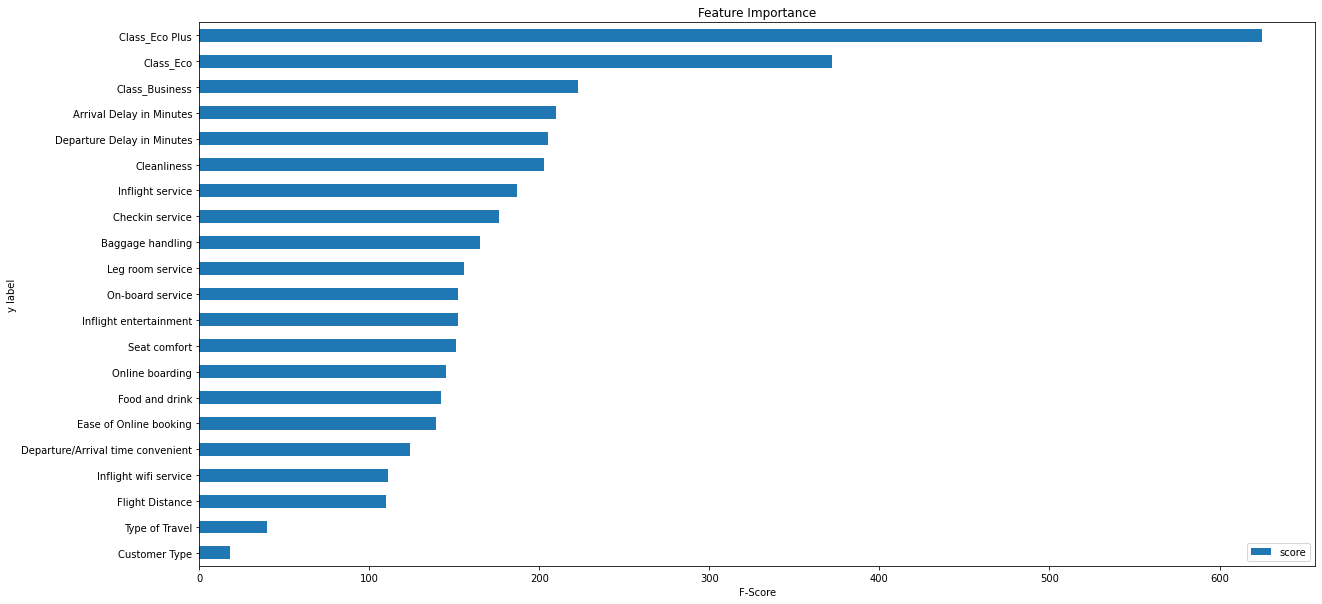

In [35]:
orig_feature_names = X_train.columns
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); ## plot top features
#ax.set_xlabel("F-Score")
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')

> <span style="font-size:16px;">  <b>Clearly the most important features are:
 >*    > <span style="font-size:16px;">  <b>Class of travel
 >*    > <span style="font-size:16px;">  <b>Arrival/Departure delays
 >*    > <span style="font-size:16px;">  <b>Services provided in the flight

> <span style="font-size:16px;">  <b>Hence, our original hypothesis turned out true, as these are the golden factors that affect the passenger satisfaction